In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Step 2: Data Cleaning (check missing values)
print(df.isnull().sum())

# Step 3: Select features and target
X = df[["MedInc", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]]
y = df["MedHouseVal"]

# Step 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_test)

# Step 7: Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Step 8: Test with sample
print("Predicted prices:", y_pred[:5])
print("Actual prices:", y_test[:5].values)


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Mean Squared Error: 0.5635037125282156
R2 Score: 0.5699787456549128
Predicted prices: [0.74084295 1.7765035  2.53625001 2.93711353 2.63019729]
Actual prices: [0.477   0.458   5.00001 2.186   2.78   ]


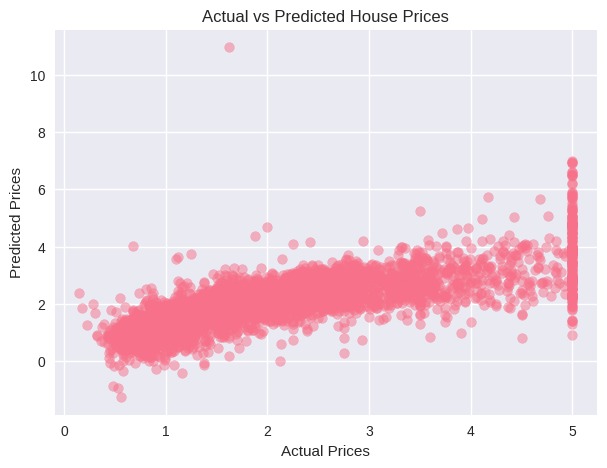

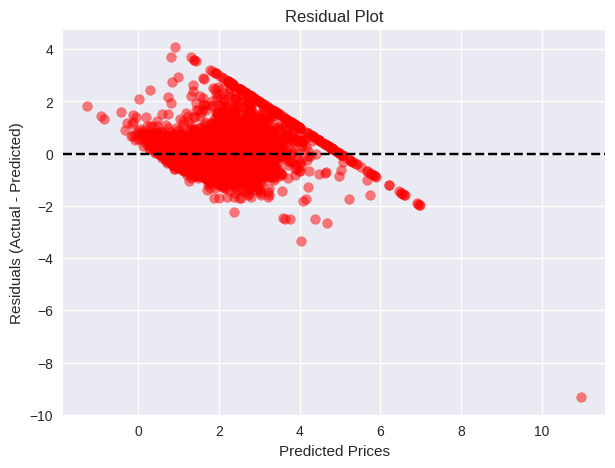

In [26]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Residual plot (errors)
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.5, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
